# Week 5

Phew. You've handed in the assignment. But there's not resting now. We're just hitting out grove, so let's get going!! Much to get through today.

## The plan for today

We continue learning about dataviz by focusing on data with two variables and their relationships. The lecture today has the following parts:
* In part 1, more lecturing on visualization and encodings.
* In part 2, we talk about exploring data with two variables, make some logarithmic plots and think about what we have read in DAOST.
* In part 3, we get a lightning intro to machine learning and the awesome package sklearn
* And finally, in part 4, we use sklearn and have fun with linear regression.

Ok. Now it's time to get started.

## Part 1: More lecturing on dataviz

So now we start learning more about the theory of visualization, digging into data encodings and representations.

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/zE6Nr8trdrw/0.jpg)](https://www.youtube.com/watch?v=zE6Nr8trdrw)

*Excercise 1:* Some questions about the video
>
> * Mention 10 examples of ways we can encode data.
1. Nodes and links
2. Length of rectangle
3. Position
4. Angles
5. area/size
6. Color intensity
7. Shape
8. Line weight
9. Line ending
10. Texture
> * Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
* No, some encodings like angles are terrible, especially in pie charts
> * Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
* It's hard to read angles from piecharts
> * Explain in your own words: What is the problem with pie-charts?
* Piecharts do not show smaller differences as clearly as something like a histogram does. It is fine to present proportions if you maybe add a legend or text on the pies with the percentage. However, in general it is hard to read the smaller differences in angle. We essentially map everything to a value between 0 and 360. This is a problem for data with more than 360 datapoints.

## Part 2: Exploratory data visualzation, two variables  

I told you how I love the Data Analysis with Open Source Tools book. You had to read Chapter 3, which is about visualizing data with two variables, before coming to class today. If you haven't yet, this is the time to do it! 

*Reading*: DAOST Chapter 3 up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF. **You will have to go and get it on DTU Learn due to the copyright stuff**.

And now a few exercises to reflect on the text:

*Exercise 2.1:* Questions from DAOST Chapter 3.

> * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?
* That the data does not look random, and that we can visually create a line between the points which looks like a ball dropping.
> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?
* In the study of muskrats and minks, the population of either species increases when the other decreases and vice versa.
> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?
* Janert mentions _weighted splines_ which are constructed from piecewise polynomial functions and a method known as LOESS which is short for locally wieghted regression. Finally, another method is exponential smoothing where you take the weighted moving average and use that to smooth the curve of time series data.
> * What are residuals? Why is it a good idea to plot the residuals of your fit?
* Residuals are the errors of your model's predictions compared to the actual data points. By plotting the residuals, the user can perhaps see some dynamics that were NOT captured by the model. For example, if the residual plot shows an exponentially increasing error, it is most likely due to the model missing an exponential part.
> * Explain in your own words the point of the smooth tube in figure 3-7.
* By creating two additional smooth curves both above and below the overall smoothing line, it gives us the the same effect as plotting a confidence interval would. Perhaps not statistically speaking, but it will give us some _idea_ on what to expect. Overall, we see that the _spread_ of runners, or the confidence that they all mostly perform the same, becomes less over the years as people perform better until we hit a certain limit where growth stagnates.
> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?
* The idea of banking is to ensure that most lines follow a 45-degree angle on the plot by changing the aspect ratio. Its purpose is to improve human perception of the graph using our eyes. If taken too literally, banking may produce plots that have extreme aspect ratios such as Figure 3-12 in the chapter.
> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.
* It points out that there are two primary processes that one goes through in visualization. The first is Graphical Analysis which aims to explore new data and patterns, it is more of an exploratory phase. This means that we want to produce a lot of plots and inspect the data from many different angles. After finding new information, we wish to communicate the data to stakeholders who don't have the same knowledge as us. In order to do this effectively, we must create clear plots that are appealing and styled in such a way that the plot itself is self-explanatory in its message. This process is called Presentation Graphics and is similar to the explanatory phase.

Ok. Let's briefly talk about logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise 2.2*: Logarithms and logarithmic plots. 

> * First, a couple of questions:
>    * What kind of relationships will a semi-log plot help you discover?
        * Exponential relationships
>    * What kind of functions will loglog plots help you see?
        * Monomial relationships ($y=ax^k$)

> * Second, we are going to create a version of [this plot](https://github.com/suneman/socialdata2022/blob/main/files/CrimeOccurrencesByCategory.png) from Week 1, where you display the $y$-axis on log-scale.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df.Date = pd.to_datetime(df['Date']) + pd.to_timedelta(df['Time'] + ':00')

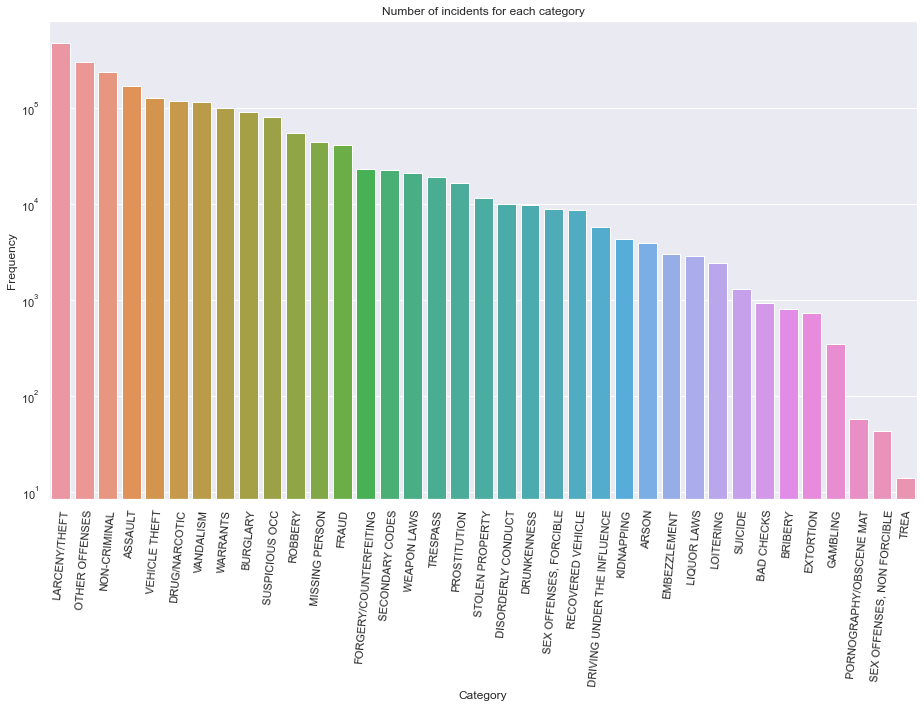

In [3]:
fig = plt.figure(figsize=(13,10))
group = df.groupby('Category').count()['IncidntNum']
sorted_ = group.sort_values(ascending=False)
g = sns.barplot(x=sorted_.index, y=sorted_)
g.set_yscale('log')
plt.xticks(rotation=85)
plt.title('Number of incidents for each category')
plt.ylabel('Frequency')
plt.tight_layout()


> * Third, let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in San Francisco. Let's see if I'm right.
>   - *Step 1:* Divide San Francisco into a grid **roughly** $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so `lat,` `lon` aren't really squares, but it is OK to ignore.
>       * **Hint 1**. I really mean approximately 100 meters. It can also be 200 meters. Or 80 meters. Or 300.
>       * **Hint 2**. Ignore outliers. We only want points that are on the SF peninsula
>       * **Hint 3**. We've made a little example of how you can do the binning. Get it [here](https://github.com/suneman/socialdata2022/blob/main/lectures/Week5_binning.ipynb).

In [4]:
import numpy as np

In [5]:
df_2 = df[(df.Y < 50) & (df.X<-122)]

We get the number of bins from the haversine distance in the example notebook

In [6]:
count, lon, lat = np.histogram2d(df_2.Y, df_2.X, bins = [130,125])

>   - *Step 2:* Count the number of thefts occurring within each grid-square (use all data for all time).

In [7]:
count[:5,:5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

>   - *Step 3:* Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space.
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, Part 3](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/lectures/Week2.ipynb) in my social graphs course.

In [8]:
def tally(k):
    # noinspection PyTypeChecker
    return sum(sum(count == k))

K = range(10000)
tallies = [tally(k) for k in K]

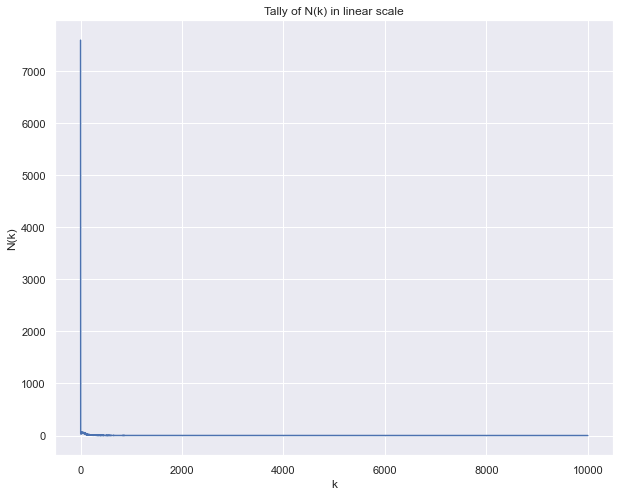

In [9]:
fig = plt.figure(figsize=(10,8))
plt.plot(K, tallies)
plt.xlabel('k')
plt.ylabel('N(k)')
plt.title('Tally of N(k) in linear scale')
plt.show()

>   - *Step 5:* Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.

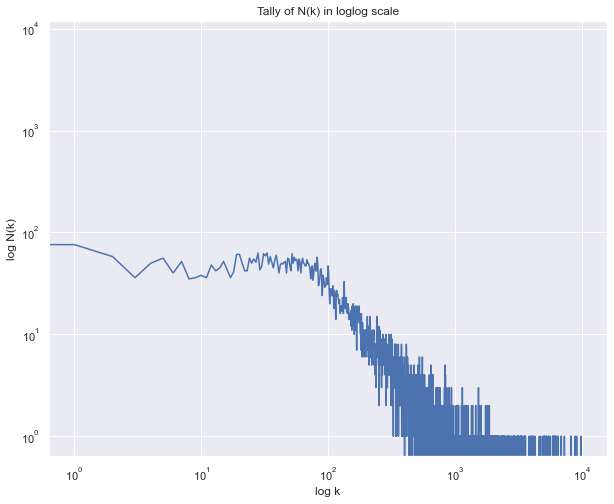

In [10]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.plot(K, tallies)
ax.set_xlabel('log k')
ax.set_ylabel('log N(k)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Tally of N(k) in loglog scale')
plt.show()

>   - *Step 6:* Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?

* He was partially correct, because after 100 crimes it starts to follow a power-law distribution due to the line being almost linear. Then there are a lot of modelling issues such as non-constant variance and so forth.

## Part 3: Lightning intro to Machine Learning and sklearn

Before we get to linear regression and as we are going to use a bit of Machine Learning in the following lectures too, we are going to have a quick intro to Machine Learning.

We kick off the machine-learning part by watching a video lecture on *What Machine Learning is*. The lecture (and the one in next weeks) have been prepared by our very own expert, Ole Winter, whose work focuses on Machine Learning. The lectures + slides have been prepared especially for you guys by Ole, and lovingly edited by Sune.

**What is machine learning?**
[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/SsCYF9tDY9Y/0.jpg)](https://www.youtube.com/watch?v=SsCYF9tDY9Y)

*Exercise 3.1* We now tie everything together (video, DAOST etc.) by answering a few questions:
> 
> * What are the different categories of Machine Learning? Where does linear regression fall in?
* Supervised, unsupervised, semi-supervised and reinforcenment learning. Linear regression uses supervised learning.
> * What is the difference between Machine Learning and Statistics? How does this idea connect to the purpose of linear regression according to Janert (DAOST Ch. 3)?
* Machine learning is mainly focused on its predictive power whilst statistics is mostly concerned on the model interpretation. Janert uses linear regression as an example of people misunderstanding that linear regression is good for summarizing data (statistics) whilst it is actually not the case, due to its simple and naive nature and difficulties dealing with other than completely linear datasets.
> * I think figure 3-14 (DAOST Ch. 3) makes an important point about linear fits that is rarely made. What is it?
* That is matters significantly what you consider to be the target and explanatory variable. The best fit will change even if the plotted line does not look too significantly different.
> * What is problematic about using straight lines to fit the data in Fig 3-5? (Something similar is actually the topic of a *Nature* article from 2004 get it [here](https://github.com/suneman/socialdata2022/blob/main/files/regrunners.pdf). And an extra [link](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3366/pdf/imm3366.pdf) on this topic for the students who know Danish).
* That the data is not linear... it's quite obvious that the data stagnates around year 1990 but has a generally declining trend until then. If one used the linear fit as prediction, we would be running a marathon in 0 minutes by year 2250. After that we would run it in negative minutes. We GAIN time by running marathons, wow. What a future.

Ok, but how do we apply different machine learning models in practice? 

The amazing package `sklearn` is state-of-the-art machine learning for Python. It's used in companies big and small all over the world and in lots of academic papers.

Today, we start with a high level overview presented in [this tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html). **Try it out**: Read/work through the first three sections (*Machine learning: the problem setting*, *Loading an example dataset*, *Learning and predicting*) to get a sense of data types and syntax.

*Exercise 3.2*: Did you read the text?
>
> * Describe in your own words how data is organized in `sklearn` (how does a *dataset* work according to the tutorial)?
* It's located in the datasets package where one can load it into a dictionary-like object with a bunch of relevant keys.
> * What is the dimensionality of the `.data` part of a dataset and what is the size of each dimension?
* Number of samples vs features

## Part 4: Linear Regression

So, now it's time for fun with standard linear regression! We'll get into that by asking the following question. 

> *Which pair of focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).*

Below I list the focus-crimes for your convenience

In [11]:
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT',
               'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT',
               'STOLEN PROPERTY', 'DISORDERLY CONDUCT']

One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.) If we look at 14 focus crimes that results in 91 pairwise comparisons. 

*Exercise 4.1*: Create the 91 scatterplots.
> * Display the plots in a $7$ by $13$ subplot matrix. You can use matplotlib's `subplot` to organize those plots. With $7$ across and $13$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.
>     * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
>     * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

In [26]:
import itertools

In [27]:
df['hour_of_the_week'] = df['Date'].dt.dayofweek * 24 + df['Date'].dt.hour

In [28]:
df_plot = df.groupby([df.Category, df.hour_of_the_week]).count().IncidntNum.reset_index()

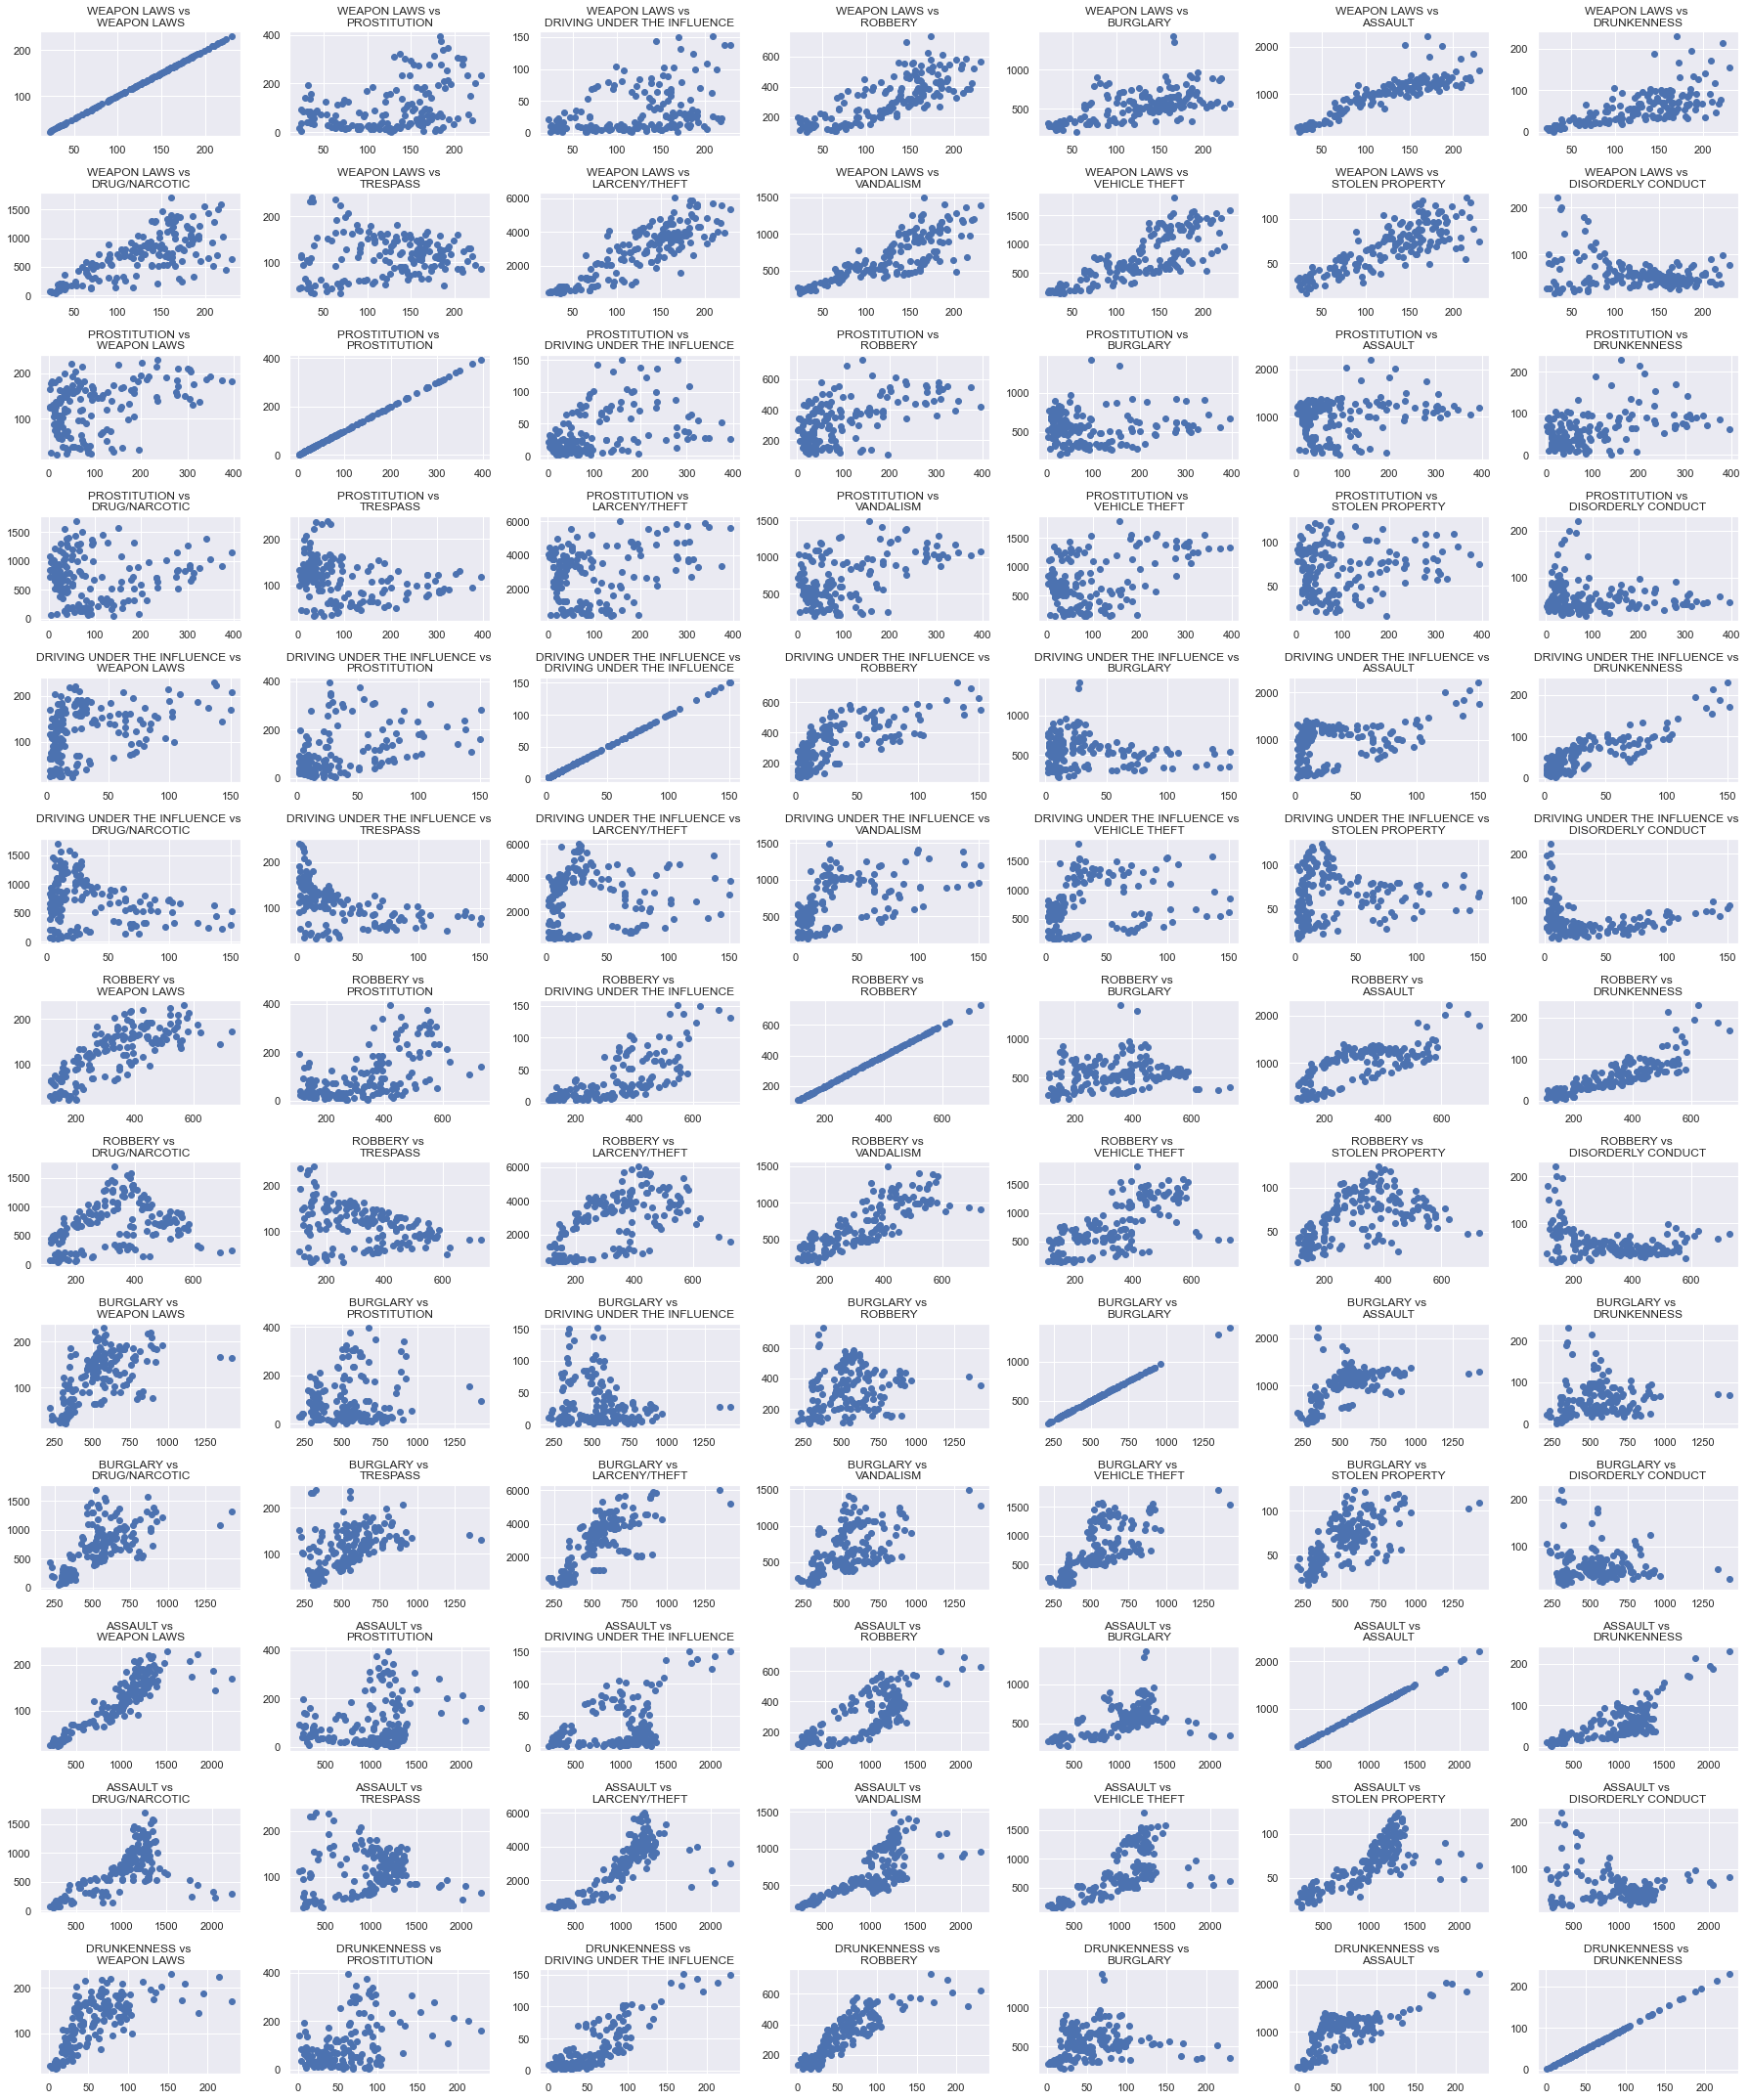

In [56]:
fig, axs = plt.subplots(13, 7, figsize=(25,30))

combinations = list(itertools.product(focuscrimes, focuscrimes))
i = 0
for row in axs:
    for col in row:
        crime_1, crime_2 = combinations[i]

        col.scatter(x=df_plot.query(f"Category == '{crime_1}'").IncidntNum, y=df_plot.query(f"Category == '{crime_2}'").IncidntNum)
        col.set_title(f"{crime_1} vs \n{crime_2}")
        i += 1

plt.tight_layout()
plt.savefig('crime_correlation.png')
plt.show()

It looks like A LOT of the crimes are correlated with each other, just to name a few:
* Weapon Laws vs
    * Robbery
    * Assault
    * Larceny/Theft
    * Vehicle Theft
    * Stolen Property
* DUI vs
    * Drunkenness
    * Robbery
    * Assault
* Robbery vs
    * Assault
    * Drunkenness
    * Vandalism


---

Next it's time for the linear regression. Janert writes about this on page 63-66. 

There is a closed-form solution for linear regression. If you want to find the best straight line $y = ax + b$ fit to a set of $N$ points $\{(x_1,y_1), (x_2,y_2), \ldots (x_N,y_N)\}$, the value of $b$ is

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i x_i$ is the mean value of the $y_i$. 

And the value for the slope $a$ is 

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$


A couple of years ago, Sune actually derived the whole thing. I've taken it out of the notebook. But if you'd like to take a look (it's a fun and instructive little exercise), you can find it **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/LinearRegressionDerived.ipynb)**. 

We are going to focus on the fit for now, but keep in mind what we have learnt so far about the purpose of linear regression! 

*Exercise 4.2:* Linear regression using sklearn.
>
> * Using [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from `sklearn`, compute the slope and intercept for each couple of focus-crimes (from Ex. 4.1) and add a linear fit to each of the 91 scatterplots above.
> * **(Optional but highly recommended)** Using the formulas we derived above (Equation 1 and 2), calculate the slopes for $a$ and $b$ in each case. Compare the results with the ones obtained with sklearn to check that everything is working as expected.
> * **(Optional)** You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue).

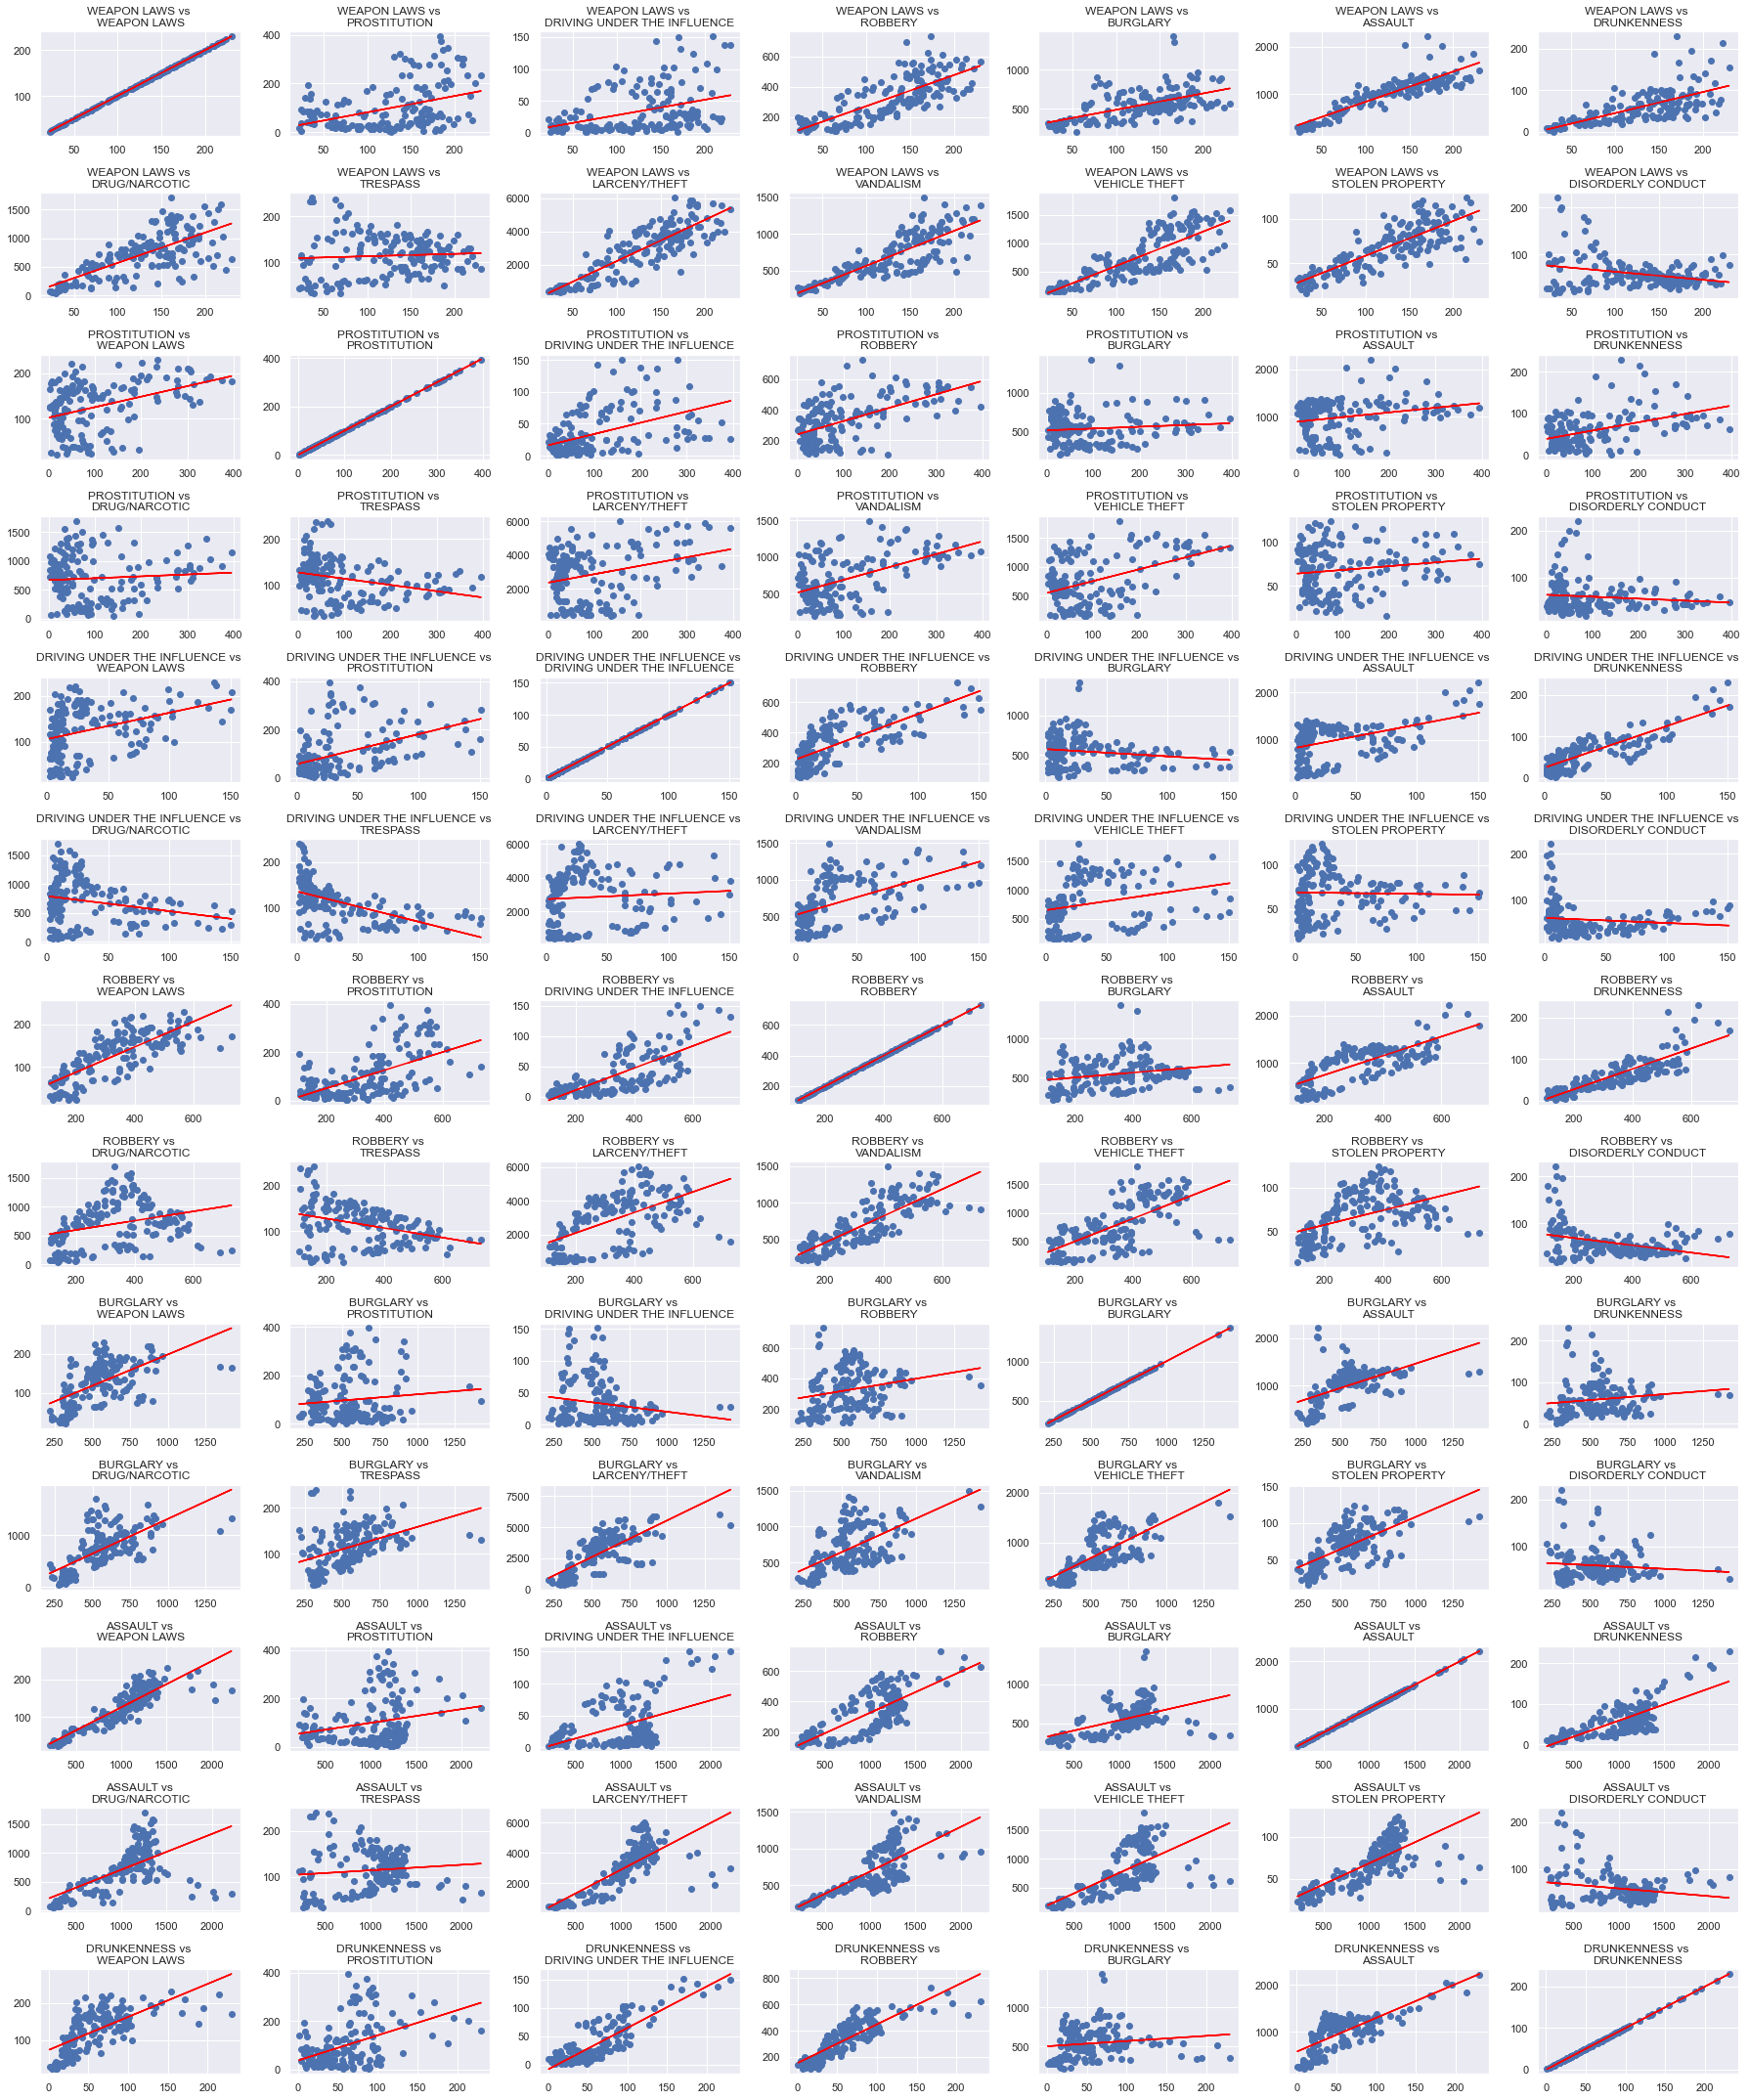

In [68]:
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(13, 7, figsize=(25,30))

combinations = list(itertools.product(focuscrimes, focuscrimes))
i = 0
for row in axs:
    for col in row:
        crime_1, crime_2 = combinations[i]
        lr = LinearRegression()

        x = df_plot.query(f"Category == '{crime_1}'").IncidntNum
        y = df_plot.query(f"Category == '{crime_2}'").IncidntNum

        lr.fit(x.values.x(-1, 1), y)

        col.plot(x, lr.predict(x.values.x(-1, 1)), color='red')
        col.scatter(x=x, y=y)
        col.set_title(f"{crime_1} vs \n{crime_2}")
        i += 1

plt.tight_layout()
plt.savefig('crime_correlation_linear_fit.png')
plt.show()


---

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. You probably also remember this one. 

Basically $R^2$ is a measures of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise 4.3:* Goodness of fit as a measure of correlation. 
> * Write a little function to calculate $R^2$ alongside each linear fit, and compare it with the one provided by the function `score()` in `sklearn`.
> * **According to the fits and associated $R^2$**, which pair of crimes have the **most similar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * According to your fits and associated measure of $R^2$, which pair of crimes have the **most dissimilar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * Explain the connection between $R^2$ and the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

In [77]:
def r2(y, y_hat):
    ss_res = sum((y - y_hat)**2)
    ss_tot = sum((y - y.mean())**2)
    return 1 - ss_res / ss_tot

In [81]:
data = []

combinations = list(itertools.product(focuscrimes, focuscrimes))
i = 0
for row in axs:
    for col in row:
        crime_1, crime_2 = combinations[i]
        lr = LinearRegression()

        x = df_plot.query(f"Category == '{crime_1}'").IncidntNum.values.reshape(-1, 1)
        y = df_plot.query(f"Category == '{crime_2}'").IncidntNum

        lr.fit(x, y)
        data.append({
            'crime_1': crime_1,
            'crime_2': crime_2,
            'r2': r2(y, lr.predict(x)),
            'score': lr.score(x, y)
        })

        i+=1

lr_df = pd.DataFrame.from_dict(data)

Our results from the `r2` functions are exactly the same as the 'score' method from sklearn. Thus it is probably the same metric.

In [92]:
lr_df.sort_values('r2', ascending=False).query('r2 != 1').head(1)

,crime_1,crime_2,r2,score
70,ASSAULT,WEAPON LAWS,0.78506,0.78506


Assault and Weapon Laws seem to be the most similarly _linear_ with respect to their temporal patterns (a perfect r2 means it increases linearly with respect to each other, at the same hour of the week and in an equal amount). This makes perfect sense, especially in America where there are a lot of guns and people who wear guns in public tend to be more violent than the standard person.

In [93]:
lr_df.sort_values('r2', ascending=False).query('r2 != 1').tail(1)

,crime_1,crime_2,r2,score
40,DRIVING UNDER THE INFLUENCE,STOLEN PROPERTY,0.000512,0.000512


It seems that the least correlated is DUI and stealing property, actually to a point where there is no correlation (r2 = 0). This could make sense as it is hard to steal and be cunning whilst drunk. I especially remember trying to sneak home drunk late at night when I lived at my parents. I was never successful.

Finally, the connection between the $R^2$ and the Pearson correlation is the fact that the $R^2$ is used to evaluate a goodness of fit for the model, essentially how well the model fits the data points. The correlation coefficient is used to describe correlation (positive or negative) between two variables, no matter how the model fits the data. For a linear model, they are similar in a way where the fitted linear model, using the closed solution, would give the closest fit. Thus if the $R^2$ is high for a fitted linear model, it is usually also high for the correlation coefficient, since strong linear correlation is easy for the model to fit onto.